# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [240]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [242]:
# 检查数据维度
data.shape

(112915, 11)

In [243]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [244]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

C:\Users\Qing\AppData\Local\Temp\ipykernel_30536\2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [245]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [246]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

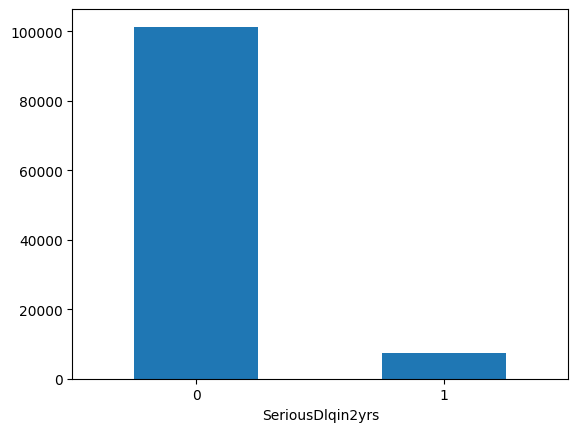

In [247]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
# count_class = pd.value_counts(data['Class'],sort=True).sort_index()

y.value_counts().plot(kind='bar')
plt.xticks(rotation = 0)

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
# y.value_counts().plot(kind='bar')


#### 2.数据预处理之离散化

In [248]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
X_train['age'].describe()

count    76053.000000
mean        51.343129
std         14.437048
min          0.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        103.000000
Name: age, dtype: float64

In [249]:
X_train['age'] = pd.cut(X_train['age'],34)
X_test['age'] = pd.cut(X_test['age'],34)

#### 3.数据预处理之独热向量编码

In [250]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
X_train = pd.get_dummies(X_train,columns=['age'],prefix_sep='_',dummy_na=False,drop_first = False)
# X_train = X_train.drop('age',axis=1)
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_(-0.103, 3.029]","age_(3.029, 6.059]","age_(6.059, 9.088]","age_(9.088, 12.118]","age_(12.118, 15.147]","age_(15.147, 18.176]","age_(18.176, 21.206]","age_(21.206, 24.235]","age_(24.235, 27.265]","age_(27.265, 30.294]","age_(30.294, 33.324]","age_(33.324, 36.353]","age_(36.353, 39.382]","age_(39.382, 42.412]","age_(42.412, 45.441]","age_(45.441, 48.471]","age_(48.471, 51.5]","age_(51.5, 54.529]","age_(54.529, 57.559]","age_(57.559, 60.588]","age_(60.588, 63.618]","age_(63.618, 66.647]","age_(66.647, 69.676]","age_(69.676, 72.706]","age_(72.706, 75.735]","age_(75.735, 78.765]","age_(78.765, 81.794]","age_(81.794, 84.824]","age_(84.824, 87.853]","age_(87.853, 90.882]","age_(90.882, 93.912]","age_(93.912, 96.941]","age_(96.941, 99.971]","age_(99.971, 103.0]"
64329,0.116959,0.0,0.326024,3100.0,7.0,0.0,0.0,0.0,1.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70087,0.050666,0.0,0.177182,10000.0,9.0,0.0,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
77642,0.038865,0.0,0.016600,5722.0,7.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
6017,0.023513,0.0,0.266260,10500.0,8.0,0.0,2.0,0.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
106521,0.039350,0.0,0.195179,1700.0,3.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [251]:
X_test = pd.get_dummies(X_test,columns=['age'],prefix_sep='_',dummy_na=False,drop_first = False)
# 对测试集
X_test.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_(20.92, 23.353]","age_(23.353, 25.706]","age_(25.706, 28.059]","age_(28.059, 30.412]","age_(30.412, 32.765]","age_(32.765, 35.118]","age_(35.118, 37.471]","age_(37.471, 39.824]","age_(39.824, 42.176]","age_(42.176, 44.529]","age_(44.529, 46.882]","age_(46.882, 49.235]","age_(49.235, 51.588]","age_(51.588, 53.941]","age_(53.941, 56.294]","age_(56.294, 58.647]","age_(58.647, 61.0]","age_(61.0, 63.353]","age_(63.353, 65.706]","age_(65.706, 68.059]","age_(68.059, 70.412]","age_(70.412, 72.765]","age_(72.765, 75.118]","age_(75.118, 77.471]","age_(77.471, 79.824]","age_(79.824, 82.176]","age_(82.176, 84.529]","age_(84.529, 86.882]","age_(86.882, 89.235]","age_(89.235, 91.588]","age_(91.588, 93.941]","age_(93.941, 96.294]","age_(96.294, 98.647]","age_(98.647, 101.0]"
107294,0.128706,0.0,0.790269,4500.0,24.0,0.0,4.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39317,0.108896,0.0,0.159920,2000.0,12.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
40606,0.153372,0.0,0.375656,4000.0,9.0,0.0,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68931,0.067802,0.0,0.297658,16696.0,13.0,0.0,1.0,0.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20745,0.399198,0.0,0.223816,17500.0,16.0,0.0,2.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 4.数据预处理之幅度缩放

In [252]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std=std.fit_transform(X_test)

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [253]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
import numpy as np
lr = LogisticRegression(C=100.0,random_state=0,solver='saga')

lr.fit(X_train_std,y_train)

coef = lr.coef_[0] #coef 系数
labels = X_train.columns[:]
indices = np.argsort(coef)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1,30,labels[indices[f]],coef[indices[f]]))



 1) NumberOfTime30-59DaysPastDueNotWorse 0.594894
 2) DebtRatio                      0.330854
 3) NumberOfTimes90DaysLate        0.199535
 4) age_(27.265, 30.294]           0.128900
 5) NumberOfDependents             0.120273
 6) age_(24.235, 27.265]           0.105089
 7) age_(33.324, 36.353]           0.100006
 8) age_(30.294, 33.324]           0.093279
 9) age_(39.382, 42.412]           0.083661
10) age_(21.206, 24.235]           0.059068
11) age_(45.441, 48.471]           0.054129
12) age_(36.353, 39.382]           0.047261
13) age_(48.471, 51.5]             0.042288
14) age_(42.412, 45.441]           0.042275
15) age_(51.5, 54.529]             0.037125
16) age_(96.941, 99.971]           0.007002
17) age_(15.147, 18.176]           0.000000
18) age_(9.088, 12.118]            0.000000
19) age_(6.059, 9.088]             0.000000
20) age_(3.029, 6.059]             0.000000
21) age_(12.118, 15.147]           0.000000
22) age_(-0.103, 3.029]            -0.009834
23) age_(87.853, 90.882] 

d:\MiniConda\envs\common\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [254]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
param_grid = {'C':[1,10,100,500],
       'penalty':['l1','l2']}

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid_search = GridSearchCV(LogisticRegression(solver='saga',n_jobs=-1,max_iter=2000),param_grid,cv=5)

In [255]:
# 输出最好的超参数
# 输出最好的模型
X_train_std1 = X_train_std[:1000] #训练时间太长，切割数据
y_train1 = y_train[:1000]
grid_search.fit(X_train_std1,y_train1)
grid_search.best_estimator_


d:\MiniConda\envs\common\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MiniConda\envs\common\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MiniConda\envs\common\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MiniConda\envs\common\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MiniConda\envs\common\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MiniConda\envs\common\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegression(C=1, max_iter=2000, n_jobs=-1, penalty='l1', solver='saga')

In [256]:
print(grid_search.best_estimator_)

LogisticRegression(C=1, max_iter=2000, n_jobs=-1, penalty='l1', solver='saga')


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [262]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.metrics import f1_score

LR = LogisticRegression(C=10,random_state=0,solver='saga',penalty='l1',n_jobs=-1)
LR.fit(X_train_std,y_train)
LR_pred = LR.predict(X_test_std)

print("Accurary Socre: {:.6f}".format(accuracy_score(y_test,LR_pred)))
print("Recall Score: {:.6f}".format(recall_score(y_test,LR_pred,average='macro')))
print(roc_auc_score(y_test,LR_pred))
print(confusion_matrix(y_test,LR_pred))
print('F1 Score: {:.2f}'.format(f1_score(y_test,LR_pred)))


Accurary Socre: 0.933456
Recall Score: 0.504310
0.504310353180651
[[30406    18]
 [ 2151    20]]
F1 Score: 0.02


d:\MiniConda\envs\common\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [267]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
from sklearn.preprocessing import binarize
# 阈值设为0.3
y_pred_prob1=LR.predict_proba(X_test_std)[:,1]
y_pred_class1 = binarize(y_pred_prob1.reshape(-1, 1), threshold=0.3)[:,0]


print('Accuracy Score: {:.6f}'.format(accuracy_score(y_test,y_pred_class1)))
print('Recall Score: {:.6f}'.format(recall_score(y_test,y_pred_class1,average='macro')))
print(roc_auc_score(y_test,y_pred_class1))
print(confusion_matrix(y_test,y_pred_class1))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_class1,average='macro')))

Accuracy Score: 0.933364
Recall Score: 0.504903
0.5049026726578801
[[30400    24]
 [ 2148    23]]
F1 Score: 0.49


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [265]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.feature_selection import SelectFromModel

sf = SelectFromModel(LR,prefit=True)
X_train_std_selected=sf.transform(X_train_std)
lr_selected = LogisticRegression(C=10,solver='saga', penalty='l1',random_state=0,n_jobs=-1)
lr_selected.fit(X_train_std_selected, y_train)


d:\MiniConda\envs\common\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, n_jobs=-1, penalty='l1', random_state=0, solver='saga')

In [268]:
lr_pred = lr_selected.predict(X_train_std_selected)
print('Accuracy Score: {:.6f}'.format(accuracy_score(y_train,lr_pred)))
print('Recall Score: {:.6f}'.format(recall_score(y_train,lr_pred,average='macro')))
print(roc_auc_score(y_train,lr_pred))
print(confusion_matrix(y_train,lr_pred))
print('F1 Score: {:.2f}'.format(f1_score(y_train, lr_pred,average='macro')))

Accuracy Score: 0.932442
Recall Score: 0.505336
0.505336458417783
[[70857    41]
 [ 5097    58]]
F1 Score: 0.49


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [269]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

# from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', 
                                n_estimators=10, # 个数
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train_std, y_train)
sfm=SelectFromModel(forest,prefit=True)
X_train_std_selected=sfm.transform(X_train_std)
forest.fit(X_train_std_selected, y_train)
f_pred=forest.predict(X_train_std_selected)
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_train,f_pred)))
print('Recall Score: {:.4f}'.format(recall_score(y_train,f_pred,average='macro')))
print('F1 Score: {:.2f}'.format(f1_score(y_train, f_pred)))
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier



Accuracy Score: 0.9899
Recall Score: 0.9271
F1 Score: 0.92


In [273]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=0, gamma=0.10,class_weight='balanced', C=1.0,max_iter=10000)
svm.fit(X_train_std, y_train)
y_pred1 = svm.predict(X_test_std)
print('Accuracy Score: {:.6f}'.format(accuracy_score(y_test,y_pred1)))
print('Recall Score: {:.6f}'.format(recall_score(y_test,y_pred1,average='macro')))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred1)))

# K最近邻
from sklearn.neighbors import KNeighborsClassifier



d:\MiniConda\envs\common\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy Score: 0.109557
Recall Score: 0.500765
F1 Score: 0.12


In [275]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
# K最近邻
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
y_pred2 = knn.predict(X_test_std)
print('Accuracy Score: {:.6f}'.format(accuracy_score(y_test,y_pred2)))
print('Recall Score: {:.6f}'.format(recall_score(y_test,y_pred2,average='macro')))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred2)))


Accuracy Score: 0.928609
Recall Score: 0.537645
F1 Score: 0.14
